In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('~/Documents/fall2019/5753/enrollment_data.csv')

In [4]:
#create target variable for SVM (-1,1)
data['Target_Enroll'] = np.where(data['Target_Enroll'] == 0, -1, data['Target_Enroll'])

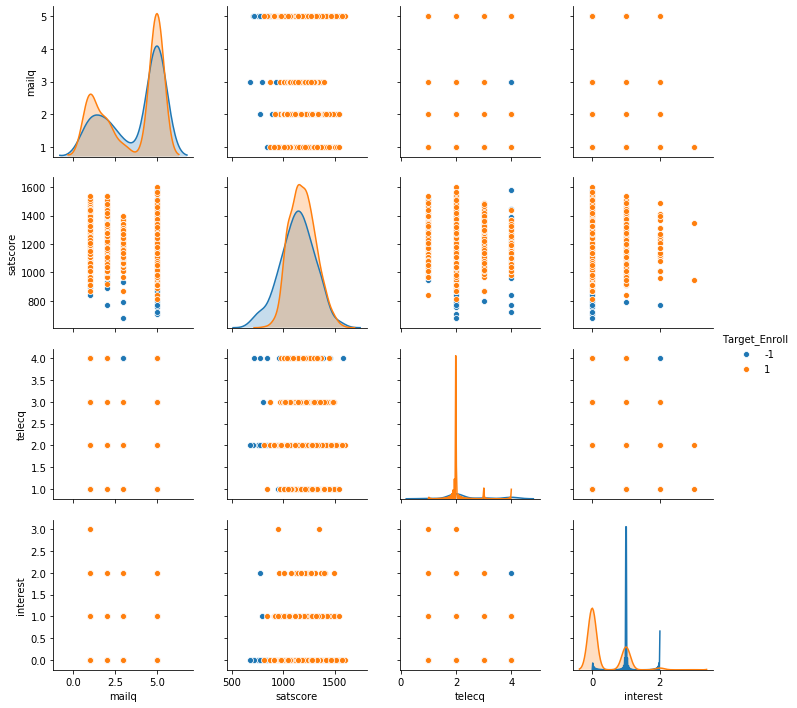

In [7]:
sns.pairplot(data, hue = 'Target_Enroll', vars=['mailq','satscore','telecq','interest'])

In [10]:
#solved unbalanced data
X = data.loc[:, data.columns != 'Target_Enroll']
y = data.loc[:, data.columns == 'Target_Enroll']

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target_Enroll'])


print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Target_Enroll']==-1]))
print("Number of subscription",len(os_data_y[os_data_y['Target_Enroll']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Target_Enroll']==-1])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Target_Enroll']==1])/len(os_data_X))

length of oversampled data is  2030
Number of no subscription in oversampled data 1015
Number of subscription 1015
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


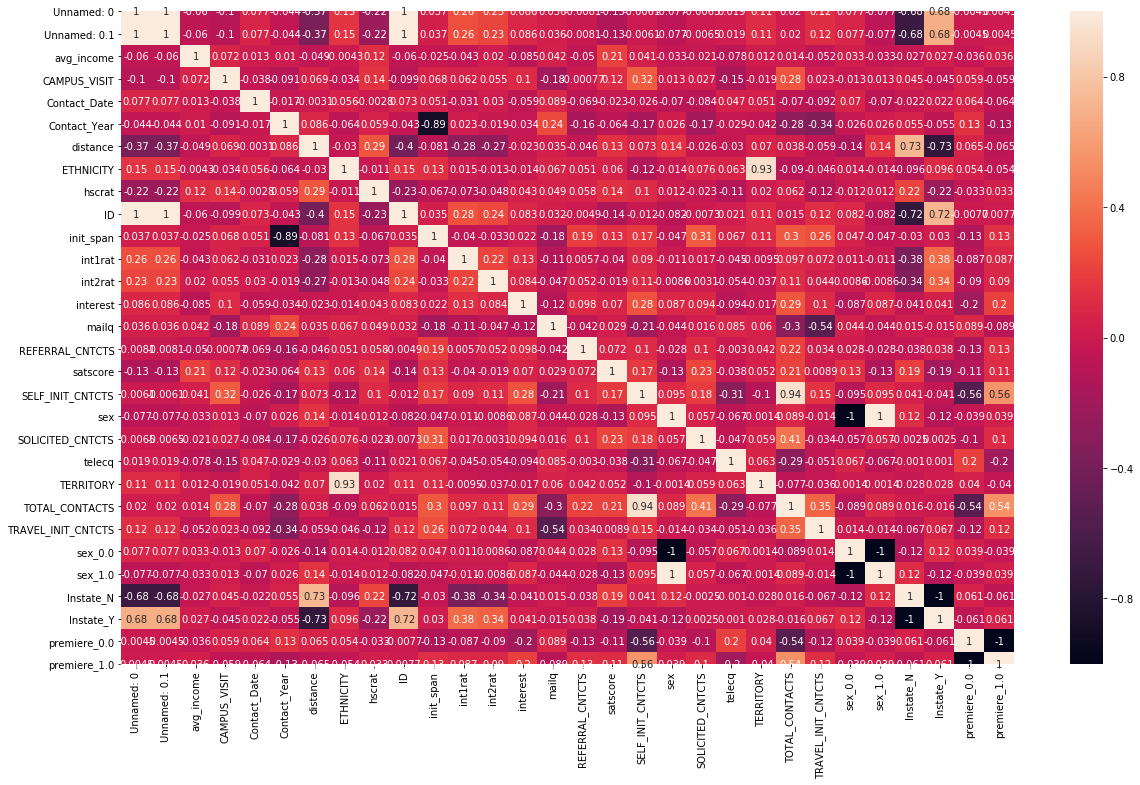

In [12]:
plt.figure(figsize = (20,12))
sns.heatmap(os_data_X.corr(), annot = True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=20)

In [20]:
from sklearn.svm import SVC
svc_model = SVC()

In [21]:
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
y_predict = svc_model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
cm = np.array(confusion_matrix(y_test, y_predict, labels = [1,-1]))
confusion = pd.DataFrame(cm, index=['enroll','not_enroll'],
                        columns=['predicted_enroll','predicted_non_enroll'])
confusion

,predicted_enroll,predicted_non_enroll
enroll,202,0
not_enroll,182,22


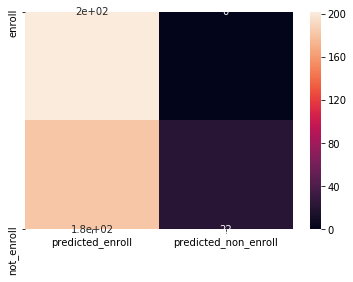

In [25]:
sns.heatmap(confusion, annot = True)

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       1.00      0.11      0.19       204
           1       0.53      1.00      0.69       202

    accuracy                           0.55       406
   macro avg       0.76      0.55      0.44       406
weighted avg       0.76      0.55      0.44       406



# normalize data

In [27]:
X_train_min = X_train.min()
X_train_min

Unnamed: 0              103.000000
Unnamed: 0.1            103.000000
avg_income            15058.000000
CAMPUS_VISIT              0.000000
Contact_Date              1.000000
Contact_Year           2011.000000
distance                  2.198764
ETHNICITY                 1.000000
hscrat                    0.000000
ID                     2738.000000
init_span                 7.000000
int1rat                   0.000000
int2rat                   0.000000
interest                  0.000000
mailq                     1.000000
REFERRAL_CNTCTS           0.000000
satscore                697.759610
SELF_INIT_CNTCTS          0.000000
sex                       0.000000
SOLICITED_CNTCTS          0.000000
telecq                    1.000000
TERRITORY                 1.000000
TOTAL_CONTACTS            1.000000
TRAVEL_INIT_CNTCTS        0.000000
sex_0.0                   0.000000
sex_1.0                   0.000000
Instate_N                 0.000000
Instate_Y                 0.000000
premiere_0.0        

In [28]:
X_train_max = X_train.max()
X_train_max

Unnamed: 0              5151.000000
Unnamed: 0.1            5151.000000
avg_income            130655.000000
CAMPUS_VISIT               2.000000
Contact_Date              31.000000
Contact_Year            2016.000000
distance                3820.892094
ETHNICITY                  7.000000
hscrat                     1.000000
ID                     82062.000000
init_span                 59.000000
int1rat                    0.500000
int2rat                    0.500000
interest                   3.000000
mailq                      5.000000
REFERRAL_CNTCTS            5.000000
satscore                1580.000000
SELF_INIT_CNTCTS          16.000000
sex                        1.000000
SOLICITED_CNTCTS           9.000000
telecq                     4.000000
TERRITORY                  9.000000
TOTAL_CONTACTS            20.000000
TRAVEL_INIT_CNTCTS         5.000000
sex_0.0                    1.000000
sex_1.0                    1.000000
Instate_N                  1.000000
Instate_Y                  1

In [29]:
X_train_range = (X_train_max - X_train_min)
X_train_range

Unnamed: 0              5048.00000
Unnamed: 0.1            5048.00000
avg_income            115597.00000
CAMPUS_VISIT               2.00000
Contact_Date              30.00000
Contact_Year               5.00000
distance                3818.69333
ETHNICITY                  6.00000
hscrat                     1.00000
ID                     79324.00000
init_span                 52.00000
int1rat                    0.50000
int2rat                    0.50000
interest                   3.00000
mailq                      4.00000
REFERRAL_CNTCTS            5.00000
satscore                 882.24039
SELF_INIT_CNTCTS          16.00000
sex                        1.00000
SOLICITED_CNTCTS           9.00000
telecq                     3.00000
TERRITORY                  8.00000
TOTAL_CONTACTS            19.00000
TRAVEL_INIT_CNTCTS         5.00000
sex_0.0                    1.00000
sex_1.0                    1.00000
Instate_N                  1.00000
Instate_Y                  1.00000
premiere_0.0        

In [30]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,Unnamed: 0,Unnamed: 0.1,avg_income,CAMPUS_VISIT,Contact_Date,Contact_Year,distance,ETHNICITY,hscrat,ID,...,telecq,TERRITORY,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS,sex_0.0,sex_1.0,Instate_N,Instate_Y,premiere_0.0,premiere_1.0
1489,0.395329,0.395329,0.246015,0.0,0.277428,0.80000,0.028142,0.017936,0.055830,0.464747,...,0.333333,0.013452,0.204862,0.00000,0.892382,0.107618,0.0,1.0,1.000000,0.000000
412,0.596474,0.596474,0.216044,0.0,0.633333,0.80000,0.044017,0.166667,0.054348,0.639504,...,0.333333,0.125000,0.157895,0.20000,1.000000,0.000000,0.0,1.0,1.000000,0.000000
1977,0.746415,0.746415,0.343089,0.0,0.270586,0.66013,0.041404,0.216775,0.052795,0.757753,...,0.566450,0.162581,0.136911,0.13987,0.699349,0.300651,0.0,1.0,1.000000,0.000000
596,0.814976,0.814976,0.219720,0.5,0.933333,0.40000,0.036525,0.500000,0.066667,0.818403,...,0.000000,0.375000,0.947368,0.60000,0.000000,1.000000,0.0,1.0,0.000000,1.000000
1257,0.782047,0.782047,0.373420,0.0,0.841030,0.71794,0.036021,0.333333,0.060409,0.785749,...,0.726466,0.250000,0.114705,0.00000,0.410302,0.589698,0.0,1.0,0.410302,0.589698


In [31]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [32]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_predict)

In [34]:
cm = np.array(confusion_matrix(y_test, y_predict, labels = [1,-1]))
confusion = pd.DataFrame(cm, index=['enroll','not_enroll'],
                        columns=['predicted_enroll','predicted_non_enroll'])
confusion

,predicted_enroll,predicted_non_enroll
enroll,142,60
not_enroll,40,164


In [35]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          -1       0.73      0.80      0.77       204
           1       0.78      0.70      0.74       202

    accuracy                           0.75       406
   macro avg       0.76      0.75      0.75       406
weighted avg       0.76      0.75      0.75       406



In [ ]:
#accuracy increased to 0.75